In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
#import seaborn as sbn
#sbn.set()

import sqlalchemy
%load_extql
engine = sqlalchemy.create_engine('postgresql://loutan01:@localhost/movies')

In [76]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [77]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [65]:
release_dates = pd.read_sql('release_date', engine)
release_dates.head()

,title,year,country,date,month,day,dow
0,Meteor,1979,Japan,1979-10-27,10,27,5
1,Meteor,1979,Norway,1979-11-27,11,27,1
2,Meteor,1979,Spain,1979-12-01,12,1,5
3,Meteor,1979,Australia,1979-12-20,12,20,3
4,Meteor,1979,Finland,1979-12-21,12,21,4


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

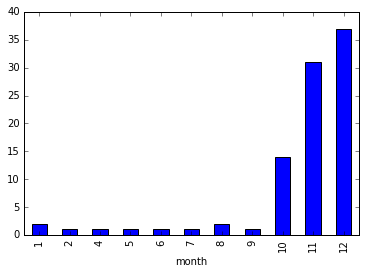

In [66]:
release_dates[(release_dates.title.str.contains("Christmas")) &(release_dates.country == "USA")].groupby('month').size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

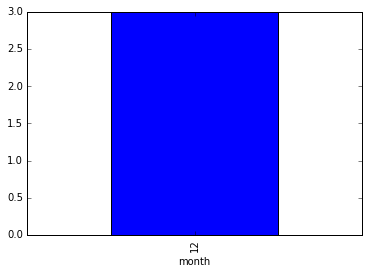

In [67]:
release_dates[(release_dates.title.str.startswith("The Hobbit")) & (release_dates.country == "USA")].groupby("month").size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

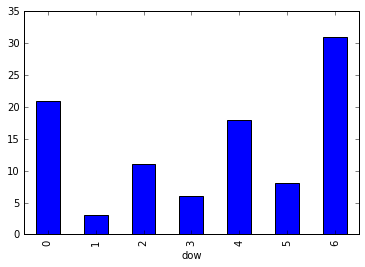

In [68]:
release_dates[(release_dates.title.str.contains("Romance")) & (release_dates.country=="USA")].groupby("dow").size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

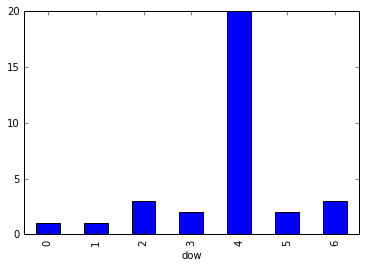

In [69]:
release_dates[(release_dates.title.str.contains("Action")) & (release_dates.country == "USA")].groupby("dow").size().plot(kind="bar")

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [70]:
denchMovies = cast[(cast.name == "Judi Dench")&(cast.year >= 1990)]
denchMovies

,title,year,name,type,character,n
2664134,Angelina Ballerina: Angelina Sets Sail,2006,Judi Dench,actress,Miss Lilly,2.0
2664135,Casino Royale,2006,Judi Dench,actress,M,4.0
2664136,Chocolat,2000,Judi Dench,actress,Armande Voizin,18.0
2664138,Die Another Day,2002,Judi Dench,actress,M,6.0
2664139,Doogal,2006,Judi Dench,actress,Narrator,7.0
2664141,GoldenEye,1995,Judi Dench,actress,M,6.0
2664142,Hamlet,1996,Judi Dench,actress,Hecuba,12.0
2664145,Home on the Range,2004,Judi Dench,actress,Mrs. Caloway,7.0
2664146,Iris,2001,Judi Dench,actress,Iris Murdoch,3.0
2664147,J. Edgar,2011,Judi Dench,actress,Annie Hoover,13.0


In [71]:
#http://stackoverflow.com/questions/30214328/how-do-i-compare-two-python-pandas-series-of-different-lengths
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html
#overloaded comparatives don't work??
potato = release_dates[(release_dates.country == "USA")&(release_dates.title.isin(denchMovies.title))&(release_dates.year.isin(denchMovies.year))][["title","date"]]
potato

,title,date
3058,Miss Peregrine's Home for Peculiar Children,2016-03-04
8788,Mrs Brown,1997-07-18
8842,Mrs Henderson Presents,2006-02-17
12169,My Week with Marilyn,2011-12-23
17946,Nine,2009-12-25
20639,Notes on a Scandal,2007-01-26
36358,Philomena,2013-11-27
37797,Pirates of the Caribbean: On Stranger Tides,2011-05-20
42646,Pride & Prejudice,2005-11-23
46457,Quantum of Solace,2008-11-14


### In which months do films with Judi Dench tend to be released in the USA?

In [72]:
denchFilms = cast[(cast.name == "Judi Dench")]
denchFilms

,title,year,name,type,character,n
2664129,84 Charing Cross Road,1987,Judi Dench,actress,Nora Doel,3.0
2664130,A Handful of Dust,1988,Judi Dench,actress,Mrs. Beaver,13.0
2664131,A Midsummer Night's Dream,1968,Judi Dench,actress,Titania,16.0
2664132,A Room with a View,1985,Judi Dench,actress,"Eleanor Lavish, a novelist",7.0
2664133,A Study in Terror,1965,Judi Dench,actress,Sally,8.0
2664134,Angelina Ballerina: Angelina Sets Sail,2006,Judi Dench,actress,Miss Lilly,2.0
2664135,Casino Royale,2006,Judi Dench,actress,M,4.0
2664136,Chocolat,2000,Judi Dench,actress,Armande Voizin,18.0
2664137,Dead Cert,1974,Judi Dench,actress,Laura Davidson,2.0
2664138,Die Another Day,2002,Judi Dench,actress,M,6.0


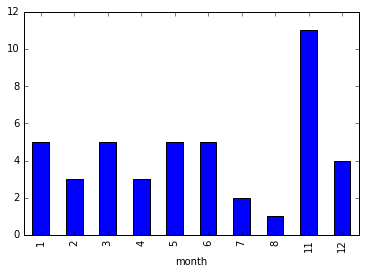

In [73]:

release_dates[(release_dates.country == "USA")&(release_dates.title.isin(c.title))&(release_dates.year.isin(c.year))][["title","month"]].groupby(["month"]).size().plot(kind="bar")

### In which months do films with Tom Cruise tend to be released in the USA?

In [74]:
dangerZone = cast[(cast.name == "Tom Cruise")]
dangerZone

,title,year,name,type,character,n
474406,A Few Good Men,1992,Tom Cruise,actor,Lt. Daniel Kaffee,1.0
474407,All the Right Moves,1983,Tom Cruise,actor,Stefen Djordjevic,1.0
474408,American Made,2017,Tom Cruise,actor,Barry Seal,NaN
474409,August,2008,Tom Cruise,actor,Himself,NaN
474410,Austin Powers in Goldmember,2002,Tom Cruise,actor,Himself,81.0
474411,Austin Powers in Goldmember,2002,Tom Cruise,actor,Famous Austin ('Austinpussy'),81.0
474412,Born on the Fourth of July,1989,Tom Cruise,actor,Ron Kovic,1.0
474413,Cocktail,1988,Tom Cruise,actor,Brian Flanagan,1.0
474414,Collateral,2004,Tom Cruise,actor,Vincent,1.0
474415,Days of Thunder,1990,Tom Cruise,actor,Cole Trickle,1.0


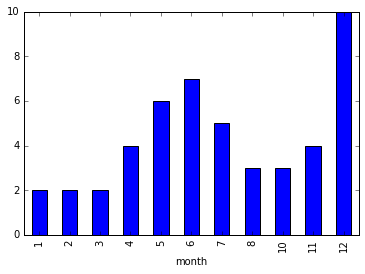

In [75]:

release_dates[(release_dates.country == "USA")&(release_dates.title.isin(dangerZone.title))&(release_dates.year.isin(dangerZone.year))][["title","month"]].groupby(["month"]).size().plot(kind="bar")